<a href="https://colab.research.google.com/github/chrispi21/ml-bc/blob/main/supervised/05_case_studies/01_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#1)
2. [Wczytanie danych](#2)
3. [Wyświetlenie kilku obrazów](#3)
4. [Przygotowanie danych do modelu](#4)
5. [Trenowanie modelu kernel='linear'](#5)
6. [Trenowanie modelu kernel='rbf'](#6)
7. [Ocena modelu](#7)
8. [Wyświetlenie błędnych predykcji](#8)

### <a name='1'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='2'></a> Wczytanie danych

In [2]:
raw_digits = datasets.load_digits()
digits = raw_digits.copy()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
images = digits['images']
targets = digits['target']
print(f'images shape: {images.shape}')
print(f'targets shape: {targets.shape}')

images shape: (1797, 8, 8)
targets shape: (1797,)


In [4]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### <a name='3'></a> Wyświetlenie kilku obrazów

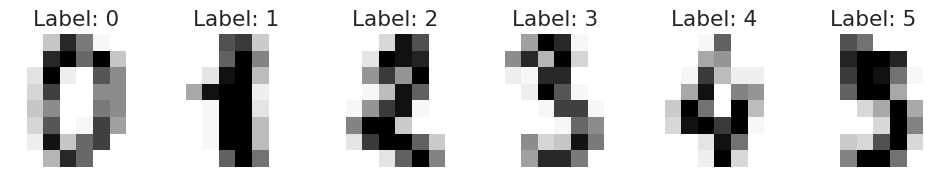

In [5]:
plt.figure(figsize=(12, 10))
for index, (image, target) in enumerate(list(zip(images, targets))[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f'Label: {target}')

### <a name='4'></a> Przygotowanie danych do modelu

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print()
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)

X_train shape: (1347, 64)
X_test shape: (450, 64)


In [7]:
X_train[0]

array([ 0.,  0.,  2., 15., 15., 16., 11.,  0.,  0.,  0.,  8., 16., 11.,
        3.,  0.,  0.,  0.,  0., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  5.,
       16.,  3.,  9., 11.,  3.,  0.,  0., 10., 15., 15., 16., 16., 11.,
        0.,  0.,  6., 16., 10.,  7., 16.,  5.,  0.,  0.,  0.,  3.,  4.,
       15.,  8.,  0.,  0.,  0.,  0.,  4., 15.,  7.,  0.,  0.,  0.])

In [8]:
y_train[0]

5

### <a name='5'></a> Trenowanie modelu kernel='linear'

In [9]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [10]:
classifier.score(X_test, y_test)

0.9822222222222222

### <a name='6'></a>  Trenowanie modelu kernel='rbf'

In [11]:
classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [12]:
classifier.score(X_test, y_test)

0.9888888888888889

### <a name='7'></a> Ocena modelu


In [13]:
y_pred = classifier.predict(X_test)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 46]])

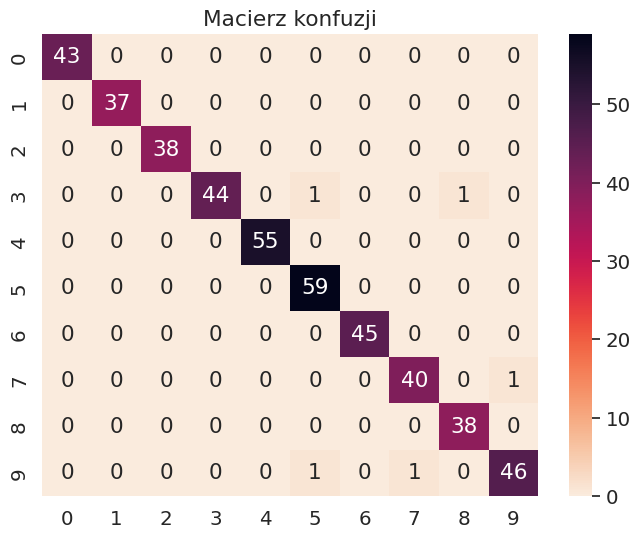

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [17]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

### <a name='8'></a> Wyświetlenie błędnych predykcji


In [18]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2
5,1,1
6,5,5
7,2,2
8,5,5
9,2,2


In [19]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[133, 149, 159, 249, 431]

In [20]:
results.loc[errors_idxs, :]

,y_pred,y_test
133,9,7
149,5,3
159,7,9
249,5,9
431,8,3


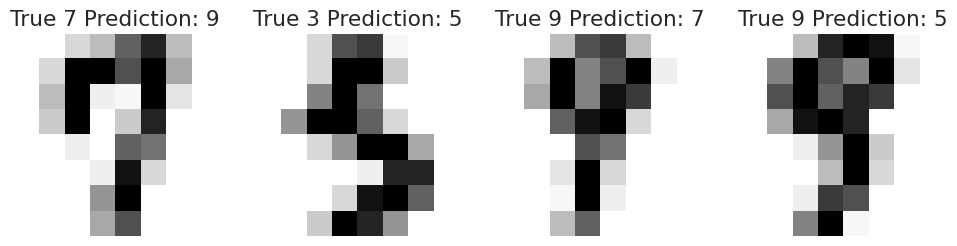

In [21]:
plt.figure(figsize=(12, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")

# Moja zabawa :)

In [4]:
# importy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)


In [5]:
data = datasets.fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
data_copy = data.copy()

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
data.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [9]:
data.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
images = data.data
target = data.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_test_split?

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.10, random_state=42)

In [36]:
example = X_train.iloc[0]

In [37]:
resized = example.to_numpy().reshape((28, 28))

In [41]:
y_train.iloc[0]

'8'

Text(0.5, 1.0, 'label=8')

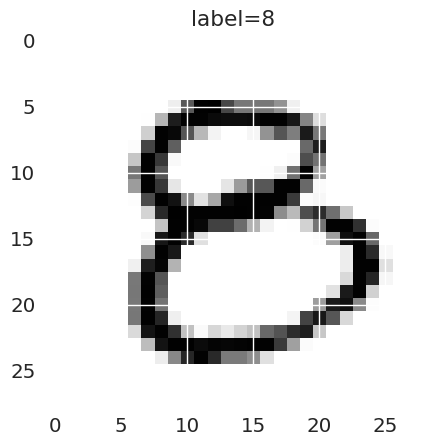

In [42]:
plt.figure()
# plt.axis('off')
plt.imshow(resized, cmap='Greys')
plt.title(f"label={y_train.iloc[0]}")
# plt.axis("off")

In [56]:
target[0]

'5'

In [18]:
# trenowanie
from sklearn.svm import SVC

In [19]:
classifier = SVC()

In [20]:
classifier.fit(X_train, y_train)

SVC()

In [21]:
classifier.score(X_test, y_test)

0.975

In [43]:
y_pred = classifier.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1       0.98      0.99      0.99       800
           2       0.96      0.98      0.97       674
           3       0.97      0.96      0.96       760
           4       0.97      0.98      0.98       611
           5       0.98      0.97      0.97       658
           6       0.98      0.99      0.98       677
           7       0.97      0.97      0.97       724
           8       0.98      0.96      0.97       693
           9       0.97      0.97      0.97       720

    accuracy                           0.97      7000
   macro avg       0.97      0.98      0.98      7000
weighted avg       0.97      0.97      0.97      7000



In [48]:
print(cm := confusion_matrix(y_test, y_pred))

[[679   0   1   0   0   0   0   0   2   1]
 [  0 791   3   2   0   0   0   3   0   1]
 [  1   1 662   0   2   0   3   2   3   0]
 [  0   2   8 729   2   8   0   3   4   4]
 [  1   0   1   0 598   0   2   1   1   7]
 [  1   0   0   9   0 638   6   1   3   0]
 [  2   0   0   0   3   3 668   0   1   0]
 [  0   4   8   0   4   0   0 702   0   6]
 [  1   3   3   9   1   4   3   4 663   2]
 [  3   5   1   5   4   1   0   4   2 695]]


<Axes: >

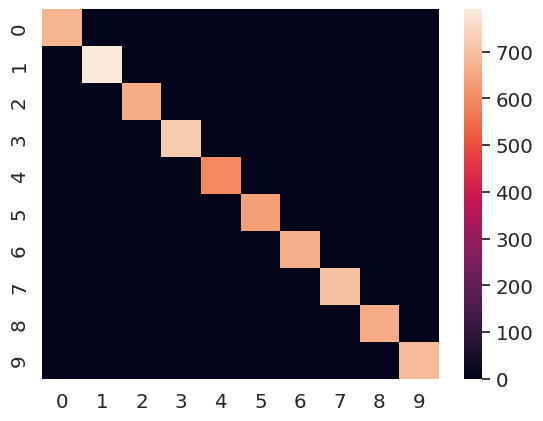

In [49]:
sns.heatmap(cm)

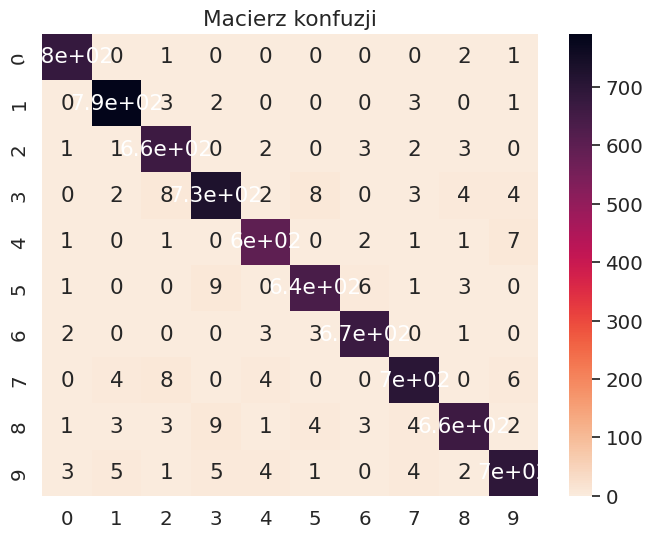

In [50]:
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [51]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [55]:
errors = (y_pred != y_test)

In [62]:
X_test[errors].iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 50522, Length: 784, dtype: float64

In [65]:
y_pred[errors][0]

'7'

In [67]:
y_test[errors].iloc[0]

'9'

In [69]:
error_example=X_test[errors].iloc[0].to_numpy().reshape((28, 28))

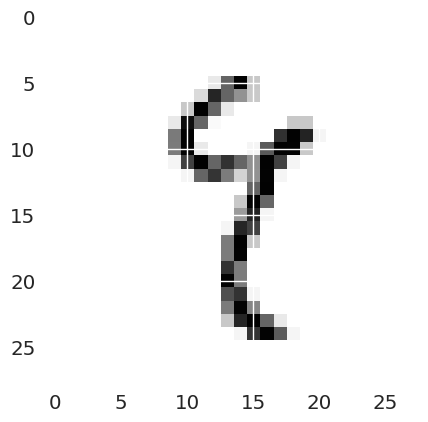

In [74]:
plt.imshow(error_example, cmap="Greys")